# Por que no SVM a equação do hiperplano é igualada a zero?

No SVM, o hiperplano separador entre duas classes é definido pela seguinte equação:

$$
w^T x + b = 0
$$

Essa equação representa a fronteira de decisão do modelo.

---

## 1. Função de decisão do SVM

O SVM calcula uma função:

$$
f(x) = w^T x + b
$$

Essa função indica:
- de que lado do hiperplano o ponto está  
- a distância do ponto até o hiperplano  

---

## 2. Regra de classificação

A classe prevista depende do sinal de \( f(x) \):

$$
\text{classe}(x) =
\begin{cases}
+1, & \text{se } f(x) > 0 \\
-1, & \text{se } f(x) < 0
\end{cases}
$$

O ponto onde o modelo está exatamente indeciso é quando:

$$
f(x) = 0
$$

---

## 3. O hiperplano é justamente o conjunto de pontos onde \( f(x) = 0 \)

A fronteira de decisão é definida por:

$$
w^T x + b = 0
$$

Esse é o limite entre as duas classes.

---

## 4. As margens do SVM

O SVM define duas margens paralelas ao hiperplano:

Margem positiva:
$$
w^T x + b = +1
$$

Margem negativa:
$$
w^T x + b = -1
$$

O hiperplano separador fica exatamente no meio:

$$
w^T x + b = 0
$$

---

## 5. Conclusão

A equação é igualada a zero porque:

- é o ponto onde a função de decisão muda de sinal  
- define a fronteira exata entre as classes  
- está no meio das margens \(+1\) e \(-1\)

Assim, a equação do hiperplano de decisão de um SVM linear é sempre:

$$
w^T x + b = 0
$$


# Cálculo do vetor ${ w }$ no SVM: o somatório ${ \sum (\alpha_i y_i x_i) }$

No SVM (Support Vector Machine), o hiperplano de decisão é definido pela equação:

$$
w^T x + b = 0
$$

onde:

- ${ w }$ é o vetor normal ao hiperplano (define sua inclinação)
- ${ b }$ é o termo de deslocamento (bias)
- ${ x }$ é um ponto do espaço de entrada

A pergunta natural é: **como o SVM calcula o vetor ${ w }$**?

A resposta é dada pela fórmula fundamental:

$$
w = \sum_{i \in SV} \alpha_i y_i x_i
$$

A seguir, explicamos cada parte dessa equação.

---

## 1. O papel dos vetores de suporte

O SVM não utiliza todos os pontos do dataset para formar o hiperplano.  
Ele usa apenas um subconjunto especial: **os vetores de suporte** (SVs).

Esses são os pontos que:

- ficam sobre a margem, ou
- violam a margem (no caso soft-margin)

Todos os demais pontos têm influência zero na construção do hiperplano.

---

## 2. O coeficiente ${\alpha_i}$

Cada vetor de suporte recebe um peso ${ \alpha_i }$, obtido na solução do problema de otimização do SVM.

Propriedades importantes:

- ${ \alpha_i > 0 }$ apenas para vetores de suporte
- ${ \alpha_i = 0 }$ para todos os demais pontos
- quanto maior o ${ \alpha_i }$, **maior a influência** do vetor de suporte no hiperplano
- ${ \alpha_i }$ está limitado por um valor máximo (relacionado ao parâmetro C)

Assim, ${ \alpha_i }$ controla **a força com que cada vetor de suporte empurra o hiperplano**.

---

## 3. O rótulo ${ y_i }$

O rótulo de cada ponto é:

$$
y_i \in \{-1, +1\}
$$

No cálculo de ${ w }$, o rótulo:

- define o lado da margem onde o SV está
- determina o sentido da contribuição

Exemplo:
- pontos da classe +1 empurram o hiperplano em um sentido  
- pontos da classe -1 empurram no sentido oposto

---

## 4. O vetor de entrada ${ x_i }$

Cada ponto é representado por seu vetor de características:

$$
x_i = (x_{i1}, x_{i2}, \ldots, x_{id})
$$

Na soma, cada ${ x_i }$ contribui com uma "força" proporcional a ${ \alpha_i \cdot y_i }$.

---

## 5. O somatório completo

Assim, o vetor ${ w }$ é construído como uma soma ponderada dos vetores de suporte:

$$
w = \sum_{i \in SV} \alpha_i y_i x_i
$$

Isso significa que:

- **apenas os vetores de suporte entram na soma**
- o hiperplano é completamente determinado por esses pontos
- os pontos não suportes têm ${ \alpha_i = 0 }$, e não afetam ${ w }$

---

## 6. Interpretação geométrica

A fórmula mostra que:

- cada vetor de suporte contribui com um empurrão no hiperplano
- o valor ${ \alpha_i y_i }$ é a intensidade e direção desse empurrão
- o vetor ${ w }$ resulta do equilíbrio dessas forças
- o hiperplano fica posicionado onde o sistema fica em “equilíbrio”

---

## 7. Conclusão

A expressão

$$
w = \sum_{i \in SV} \alpha_i y_i x_i
$$

é fundamental porque revela que:

- o SVM usa somente os vetores de suporte para definir o hiperplano
- cada SV tem um peso ${ \alpha_i }$ proporcional à sua importância
- o rótulo ${ y_i }$ determina o sentido da influência
- a soma ponderada resulta no vetor normal ${ w }$, que determina a separação entre as classes

Essa fórmula mostra por que o SVM é eficiente, robusto e elegante:  
o modelo final depende apenas dos pontos críticos que realmente importam.


In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Os dados contem informações sobre o comprimento e largura das petalas e das sepas de diferentes tipos de flores iris

In [7]:
iris.data 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


As classificações alvo estao a seguir:

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Separando o conjunto de dados

In [9]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


Classificador SVM

In [10]:
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X,y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
#Quantidade de vetores de suporte por classe
svm_clf.n_support_

array([1, 1], dtype=int32)

In [12]:
#Coeficientes da função de decisão para os vetores de suporte
svm_clf.dual_coef_

array([[-1.,  1.]])

In [13]:
#Coordenada dos pontos dos vetores de suporte
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [14]:
#valor b do hiperplano
svm_clf.intercept_[0]

np.float64(-3.2799999713897705)

In [15]:
#Coeficientes dos pesos W
svm_clf.coef_

array([[1.1, 0.7]])

Classificador Ruim

In [16]:
x0 = np.linspace(0,5.5,200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [17]:
def plt_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    #Limiar de decisao: w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1

    #desenho da reta
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = (-w[0]/w[1]) * x0 - b/w[1]

    #ao isolar x1 a margem depende de +-1/w1
    # gutter_up:     w0*x0 + w1*x1 + b = +1   (margem positiva)
    # decision:      w0*x0 + w1*x1 + b = 0    (hiperplano)
    # gutter_down:   w0*x0 + w1*x1 + b = -1   (margem negativa)

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)


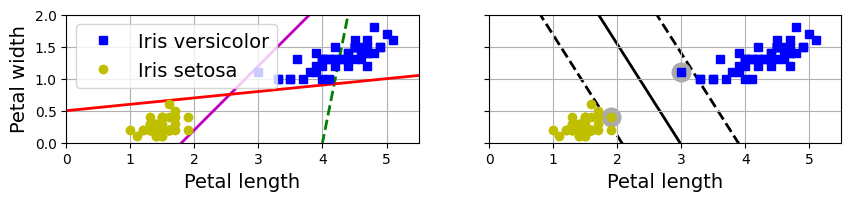

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, 'g--', linewidth=2)
plt.plot(x0, pred_2, 'm-', linewidth=2)
plt.plot(x0, pred_3, 'r-', linewidth=2)

plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label="Iris versicolor")
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label="Iris setosa")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plt_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label="Iris versicolor")
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label="Iris setosa")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

SVM: Procura o melhor hiperplano, no caso 2d uma reta, que separa o conjunto de dados. Os pontos mais proximos do hiperplano são utilizados como vetores de suporte.

#### Margem Rigida

Nao pode haver valores entre as margens, estilo mais rigoroso e so funciona com dados linearmente separaveis

[]

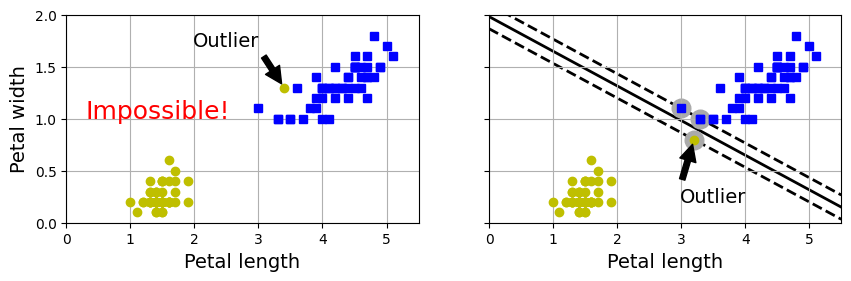

In [19]:
#O classificador linear nao opera bem com outliers, nao é possivel encontrar uma melhor reta em alguns casos extremos:

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

X01 = np.concatenate([X, X_outliers[:1]], axis=0)
y01 = np.concatenate([y, y_outliers[:1]], axis=0)
X02 = np.concatenate([X, X_outliers[1:]], axis=0)
y02 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(random_state=42, kernel='linear', C=100)
svm_clf2.fit(X02, y02)

#sharey=True : compartilhar o mesmo eixo Y
#sharex=True : compartilhar o mesmo eixo X
figure,axis = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

#Definindo qual eixo vou trabalhar, axis[0]
plt.sca(axis[0])
plt.plot(X01[:,0][y01==1], X01[:,1][y01==1], 'bs')
plt.plot(X01[:,0][y01==0], X01[:,1][y01==0], 'yo')
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate("Outlier", 
                xy=(X_outliers[0][0], X_outliers[0][1]),
                xytext=(2.5,1.7),
                ha='center',
                arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([0, 5.5, 0, 2])
plt.grid()

#Definindo o proximo eixo axis[1]
plt.sca(axis[1])
plt.plot(X02[:,0][y02==1], X02[:,1][y02==1], 'bs')
plt.plot(X02[:,0][y02==0], X02[:,1][y02==0], 'yo')

plt_svc_decision_boundary(svm_clf2, 0, 5.5)

plt.xlabel("Petal length")

plt.annotate("Outlier", 
                xy=(X_outliers[1][0], X_outliers[1][1]),
                xytext=(3.5,.2),
                ha='center',
                arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.plot()

Escala dos valores.

SVM é sensivel as escalas

[]

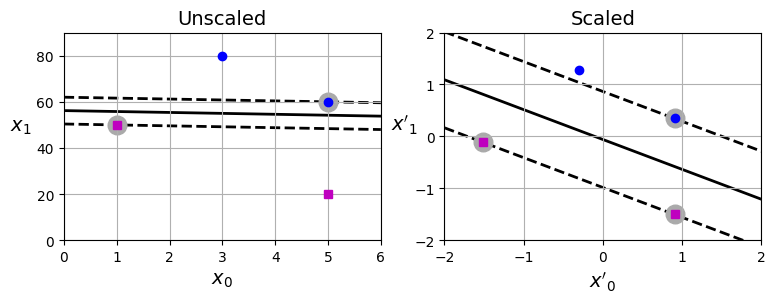

In [20]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plt_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plt_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.plot()

### Margem suave

Controlada pelo hiperparametro C, controla o quao espessa é a margem. Permite controlar a quantidade de violações

In [21]:
def hiperplano(svm,interval, scaler = None):
    #constante b do hiperplano
    if(scaler):
       b = svm.decision_function([-scaler.mean_ / scaler.scale_])
    else:
        b = svm.intercept_[0]
    
    #pontos utlizados como vetores de suporte
    x = svm.support_vectors_

    #Coeficientes dos pesos W
    if(scaler):
        w = svm.coef_[0] / scaler.scale_ 
    else:
        w = svm.coef_[0]

    #Equação do hiperplano, reta no caso 2D:
    # w1*x1 + w2*x2 + b = 0
    # Se x1 = x, x2 = y
    # x2 = -(w1*x1 + b)/w2
    #Computacionalmente é melhor:
    # x2 = (-w1/w2)*x1 - b/w2

    hiperplano = (-w[0]/w[1])*interval - b/w[1]
    plt.plot(interval, hiperplano, 'k--', linewidth=2)

def margins(svm, interval, scaler = None):
    #constante b do hiperplano
    if(scaler):
       b = svm.decision_function([-scaler.mean_ / scaler.scale_])
    else:
        b = svm.intercept_[0]
    
    #pontos utlizados como vetores de suporte
    if(scaler):
       x = svm.support_vectors_ * scaler.scale_ + scaler.mean_
    else:
        x = svm.support_vectors_

    #Coeficientes dos pesos W
    if(scaler):
        w = svm.coef_[0] / scaler.scale_ 
    else:
        w = svm.coef_[0]
    #Equação das margens, caso 2d:
    # w1*x1 + w2*x2 + b = +-1
    # Se x1 = x, x2 = y
    # x2 = -(w1*x1 + b + 1)/w2
    margin_rigth = (-w[0]/w[1])*interval - (b + 1)/w[1]
    margin_left = (-w[0]/w[1])*interval - (b - 1)/w[1]
    plt.plot(interval, margin_rigth, 'k-', linewidth=2)
    plt.plot(interval, margin_left, 'k-', linewidth=2)
    plt.scatter(x[:,0],x[:,1], s=180, facecolors='#AAA',
                zorder=-1)



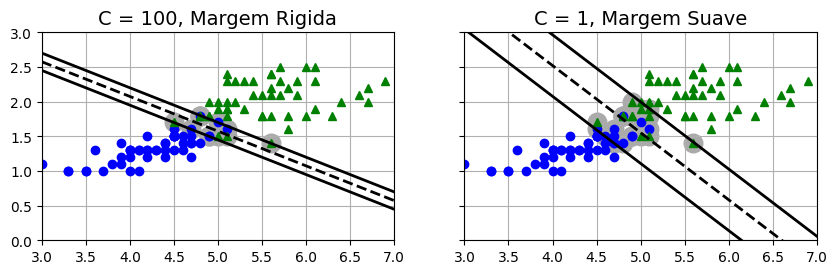

In [22]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

virginica_or_versicolor = (y == 2) | (y == 1)
X = X[virginica_or_versicolor]
y = y[virginica_or_versicolor]

X_interval = np.linspace(3,7,400)

figure,axis = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axis[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")

svm_clf = SVC(random_state=42, C=100, kernel="linear")
svm_clf.fit(X,y)

margins(svm_clf, X_interval)
hiperplano(svm_clf, X_interval)
plt.title("C = 100, Margem Rigida")
plt.grid()
plt.axis([3, 7, 0, 3])

plt.sca(axis[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")

svm_clf = SVC(random_state=42, C=1, kernel="linear")
svm_clf.fit(X,y)

margins(svm_clf, X_interval)
hiperplano(svm_clf, X_interval)
plt.title("C = 1, Margem Suave")
plt.grid()

plt.axis([3, 7, 0, 3])

plt.show()

Escalonando as variaveis usando StandardScaler: ${x = \frac{x - \mu}{\sigma}}$

#### Atenção

Ao usar o StandardScaler o espaço original é alterado pela formula aplicada, deve-se de-escalar os dados para plotalo no devido lugar

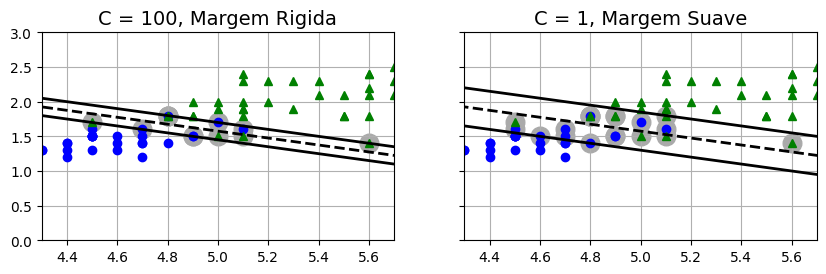

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

virginica_or_versicolor = (y == 2) | (y == 1)
X = X[virginica_or_versicolor]
y = y[virginica_or_versicolor]

svm_clf_1 = SVC(random_state=42, C=100, kernel="linear")
svm_clf_2 = SVC(random_state=42, C=1, kernel="linear")

pipeline_1 = make_pipeline(scaler, svm_clf_1)
pipeline_2 = make_pipeline(scaler, svm_clf_2)

X_interval = np.linspace(3,7,400)

figure,axis = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axis[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")

pipeline_1.fit(X,y)

margins(pipeline_1[-1], X_interval, scaler)
hiperplano(pipeline_1[-1], X_interval, scaler)
plt.title("C = 100, Margem Rigida")
plt.grid()
plt.axis([4.3, 5.7, 0, 3])

plt.sca(axis[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")

pipeline_2.fit(X,y)

margins(pipeline_2[-1], X_interval, scaler)
hiperplano(pipeline_2[-1], X_interval, scaler)
plt.title("C = 1, Margem Suave")
plt.grid()

plt.axis([4.3, 5.7, 0, 3])

plt.show()

# 🔄 Transformando um SVM Linear em um Modelo Treinado com SGD

Neste tutorial mostramos como **reproduzir um SVM Linear (LinearSVC ou SVC(kernel="linear")) usando SGDClassifier**, que otimiza diretamente a **hinge loss** através de *Stochastic Gradient Descent*.

Isso permite treinar SVMs:

- de forma **muito mais rápida**  
- em datasets **grandes**  
- de forma **online (partial_fit)**  
- com um custo computacional muito menor  


---

## 🧠 1. A ideia central: SVM Linear = hinge-loss + regularização L2

O SVM Linear resolve o problema:

${
\min_{w,b} \frac{1}{2} \|w\|^2 + C \sum_{i} \max(0, 1 - y_i (w \cdot x_i + b))
}$

onde a função:

${
\max(0, 1 - y f(x))
}$

é a **hinge loss**.

O SGDClassifier permite otimizar **exatamente a mesma função**:

```python
SGDClassifier(loss="hinge", penalty="l2")


### Problemas nao lineares

As SVM possuem dificuldades em tratar casos nao lineares, devido a nao ser possivel dividir classes nao lineares com uma simples reta. Porém, há formas de contornar esses problemas, por exemplo levando o problema a uma ordem superior.

No exemplo abaixo, saimos de um problema uni-dimensional (1D), impossivel de classificar linearmente, para um problema 2D o qual é facilmente classificado por um reta horizontal. Bastou acrescentarmos uma nova feature ao problema.

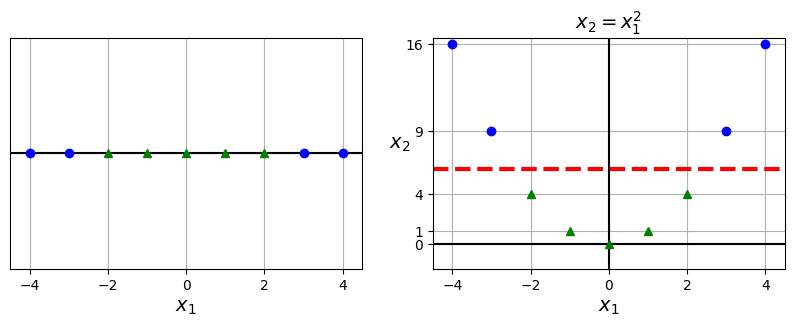

In [24]:
X1 = np.linspace(-4,4,9).reshape(-1,1)
X2 = np.c_[X1, X1**2]

y = np.array([0,0,1,1,1,1,1,0,0])

figure, axis = plt.subplots(ncols=2,figsize=(10,3) )

plt.sca(axis[0])
plt.grid()
plt.axhline(y=0, color='k')
plt.gca().get_yaxis().set_ticks([])
plt.plot(X1[:,0][y==0],np.zeros(4), 'bo')
plt.plot(X1[:,0][y==1],np.zeros(5), 'g^')
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.xlabel("$x_1$")

plt.sca(axis[1])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.gca().get_yaxis().set_ticks([0,1,4,9,16])
plt.plot([-4.5,4.5],[6,6], 'r--', linewidth=3)
plt.plot(X2[:,0][y==0],X2[:,1][y==0], 'bo')
plt.plot(X2[:,0][y==1],X2[:,1][y==1], 'g^')
plt.xlim((-4.5,4.5))
plt.ylim((-2,16.5))
plt.grid()
plt.xlabel("$x_1$")
label = plt.ylabel("$x_2$", rotation = 0)
label.set_position((0,.5))
plt.title('$x_2 = x_1^2 $')

plt.show()

In [25]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=.15, random_state=42)

polynomial_svm_clf =make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


Text(0, 0.5, '$x_2$')

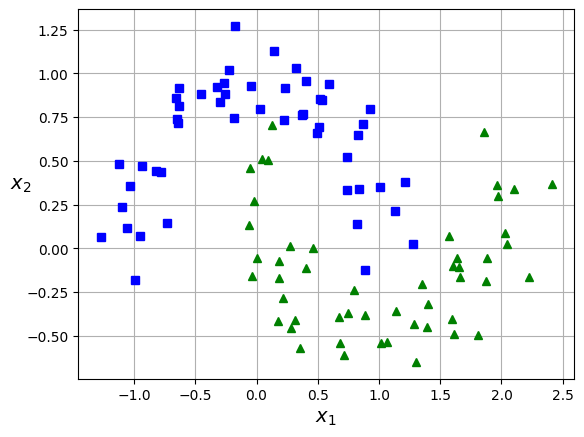

In [26]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)

In [27]:
x0s = np.linspace(-1.5,2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
#x0 é uma copia de x0s em linhas
#x1 é uma copia de x1s em colunas
X_grid = np.c_[x0.ravel(), x1.ravel()]
#ravel() espalha o array original em uma unica linha continua, flatten() cria uma copia 

In [28]:
np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]]).ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
y_pred = polynomial_svm_clf.predict(X_grid)

In [31]:
y_decision = polynomial_svm_clf.decision_function(X_grid)

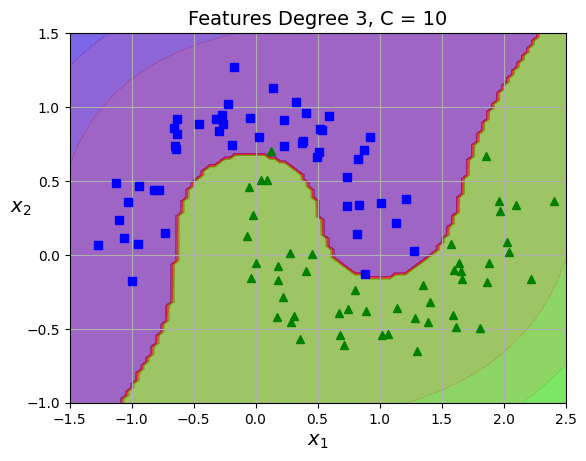

In [32]:
plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.5)
plt.contourf(x0, x1, y_decision.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.2)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title("Features Degree 3, C = 10")
plt.show()

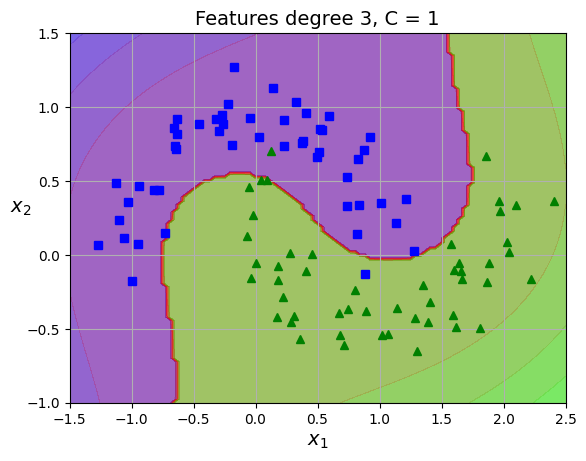

In [33]:
polynomial_svm_clf =make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

y_decision = polynomial_svm_clf.decision_function(X_grid)
y_pred = polynomial_svm_clf.predict(X_grid)

plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.5)
plt.contourf(x0, x1, y_decision.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.2)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title("Features degree 3, C = 1")
plt.show()

Quando mais features colocamos, com PolynomialFeatures, mais sobreajustado o modelo fica aos dados. E isso gera problemas de generalização com dados novos.

O parametro C esta controlando a tolerancia a violações. O segundo grafico possui os mesmo parametros exceto o C, o qual é menor e com isso possui maior flexibilidade a invasões

### Kernel Polinomial (Kernel Trick)

Uma operação matematica que permite simular features de polinimios de graus maiores sem realmente adicionar essas features, isso permite operações mais rapidas:

In [34]:
from sklearn.svm import SVC

def pltKernel(degree = 1, coef0 = 1, C = 10, X=None, y=None):

    x0s = np.linspace(-1.5,2.5,100)
    x1s = np.linspace(-1,1.5,100)

    x0,x1 = np.meshgrid(x0s,x1s)

    X_grid = np.c_[x0.ravel(), x1.ravel()]

    poly_kernel_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=degree, coef0=coef0, C=C)
)
    poly_kernel_clf.fit(X,y)

    y_pred = poly_kernel_clf.predict(X_grid).reshape(x0.shape)

    plt.contourf(x0,x1,y_pred, cmap = plt.cm.brg, alpha=0.5)
    

C:\Users\Alfredo\AppData\Local\Temp\ipykernel_22860\325953472.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


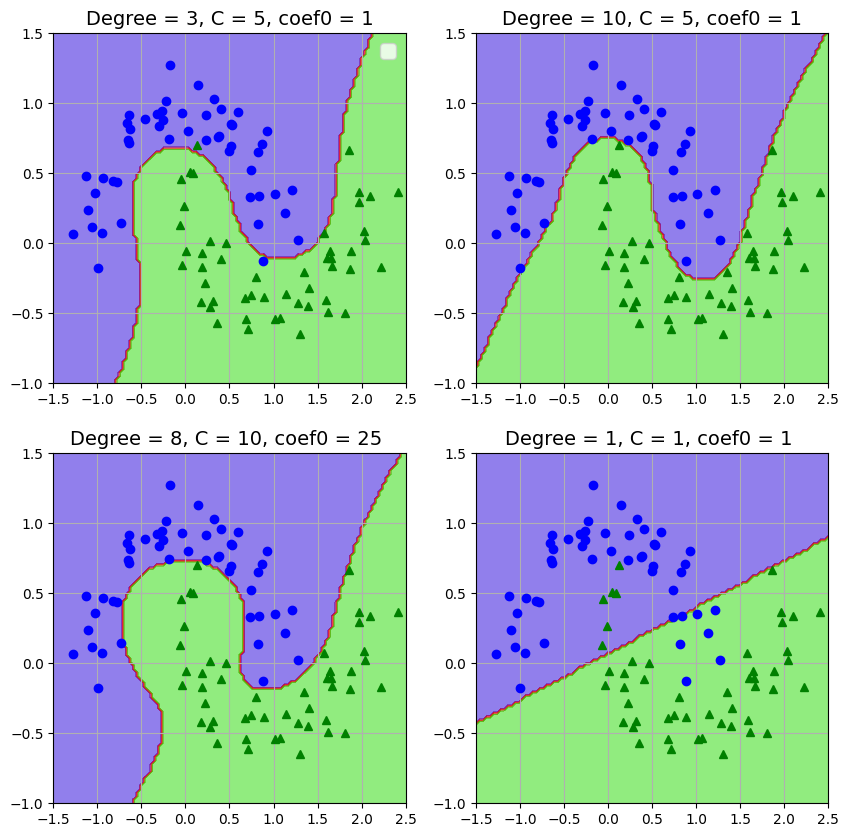

In [77]:
figure, axes = plt.subplots(ncols=2,nrows=2, figsize=(10,10))

plt.sca(axes[0][0])
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
plt.grid()
degree = 3
coef0 = 1
C = 5
pltKernel(degree = degree, coef0 = coef0, C = C, X=X, y=y)
plt.title(f'Degree = {degree}, C = {C}, coef0 = {coef0}')
plt.legend()

plt.sca(axes[0][1])
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
plt.grid()
degree = 10
coef0 = 1
C = 5
pltKernel(degree = degree, coef0 = coef0, C = C, X=X, y=y)
plt.title(f'Degree = {degree}, C = {C}, coef0 = {coef0}')

plt.sca(axes[1][0])
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
plt.grid()
degree = 8
coef0 = 25
C = 10
pltKernel(degree = degree, coef0 = coef0, C = C, X=X, y=y)
plt.title(f'Degree = {degree}, C = {C}, coef0 = {coef0} ')

plt.sca(axes[1][1])
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
plt.grid()
degree = 1
coef0 = 1
C = 1
pltKernel(degree = degree, coef0 = coef0, C = C, X=X, y=y)
plt.title(f'Degree = {degree}, C = {C}, coef0 = {coef0} ')

plt.show()


O termo coef0 controla a influencia dos pesos de graus mais elevados. Quanto menor, mais influencia os graus maiores tem, quanto menor o parametro mais influencia os termos de baixa ordem tem.

Serve para controlar a curvatura do grafico

### Caracteriaticas de Similaridade

Função Base Radial (RBF):  $${\phi(x,l) = \exp(-\gamma(x-l)^2) = e^{-\gamma(x-l)^2}}$$

Ela faz um calculo de similaridade baseada na distancia de um ponto ${x}$ até um ponto ${l}$, o termo ${\gamma}$ controla a largura da função e com ele é possivel alargar ou afinar a curva, gerando menor ou maior filtro.

Quanto maior ${\gamma}$ maior a seletividade, a curva afina
Quanto menor ${\gamma}$ menor a seletividade, a curva alarga

Controlar o fator ${\gamma}$ pode alterar todo o problema

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. Função RBF
# ============================================================
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

# ============================================================
# 2. Geração dos dados
# ============================================================
def generate_data(gamma):
    x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
    X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

    x2s = gaussian_rbf(x1s, -2, gamma)
    x3s = gaussian_rbf(x1s, 1,  gamma)

    XK = np.c_[gaussian_rbf(X1D, -2, gamma),
               gaussian_rbf(X1D, 1, gamma)]

    yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    return x1s, x2s, x3s, X1D, XK, yk

# ============================================================
# 3. Gráfico da similaridade 1D
# ============================================================
def plot_similarity_1d(ax, x1s, x2s, x3s, X1D, XK, yk, gamma):
    plt.sca(ax)

    # Curvas RBF
    plt.plot(x1s, x2s, 'r--')
    plt.plot(x1s, x3s, 'b--')
    plt.grid()

    # Landmarks
    plt.scatter(-2, 1, s=100, alpha=0.7, c="red")
    plt.plot([-2, -2], [0, 1], 'k--')

    plt.scatter(1, 1, s=100, alpha=0.7, c="red")
    plt.plot([1, 1], [0, 1], 'k--')

    # Dados discretizados
    plt.plot(X1D[:, 0][yk == 0], np.zeros(sum(yk == 0)), 'bo')
    plt.plot(X1D[:, 0][yk == 1], np.zeros(sum(yk == 1)), 'g^')

    # Escala
    plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.xlabel("$x_1$")
    plt.ylabel("Similarity")
    plt.title(rf'$\gamma = {gamma}$')

    # Destacando ponto X1D[3]
    idx = 3
    x_val = X1D[idx, 0]

    plt.plot([x_val, x_val], [0, XK[idx][0]], 'k-')
    plt.scatter(x_val, XK[idx][0], s=50, c="k")
    plt.scatter(x_val, XK[idx][1], s=50, c="k")

    # Anotações
    plt.annotate(
        fr'$\mathbf{{Similarity\ x3 = {XK[idx][1].round(2)}}}$',
        xy=(x_val, 0), xytext=(-.8, XK[idx][1]), ha="left", fontsize=8
    )

    plt.annotate(
        fr'$\mathbf{{Similarity\ x2 = {XK[idx][0].round(2)}}}$',
        xy=(x_val, 0), xytext=(-.8, XK[idx][0]), ha="left", fontsize=8
    )

    plt.annotate(
        r'$\mathbf{x} = -1,33$',
        xy=(x_val, 0), xytext=(-1, -0.085), ha="center", fontsize=8
    )

    plt.text(-1.7, 0.9, "$x_2$", ha="center", fontsize=13)
    plt.text(1.3, 0.9, "$x_3$", ha="center", fontsize=13)

    plt.axis([-4.1, 4.1, -0.1, 1.1])


# ============================================================
# 4. Gráfico 2D do espaço transformado (feature space)
# ============================================================
def plot_feature_space(ax, XK, yk):
    plt.sca(ax)

    plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], 'bo')
    plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], 'g^')

    # Hiperplano linear
    plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)

    # Ponto anotado (x = -1.33)
    idx = 3
    plt.annotate(
        r'$\phi\left(\mathbf{x}\right)$' + f' = ({XK[idx][0].round(2)}, {XK[idx][1].round(2)})',
        xy=(XK[idx, 0], XK[idx, 1]),
        xytext=(0.65, 0.50),
        ha="center",
        arrowprops=dict(facecolor='black', shrink=0.1),
        fontsize=10
    )

    plt.grid()
    plt.xlabel("$x_2$")
    plt.ylabel("$x_3$")


# ============================================================
# 5. Função principal
# ============================================================
def main(gamma=0.3):
    x1s, x2s, x3s, X1D, XK, yk = generate_data(gamma)

    fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

    plot_similarity_1d(axes[0], x1s, x2s, x3s, X1D, XK, yk, gamma)
    plot_feature_space(axes[1], XK, yk)

    plt.tight_layout()
    plt.show()



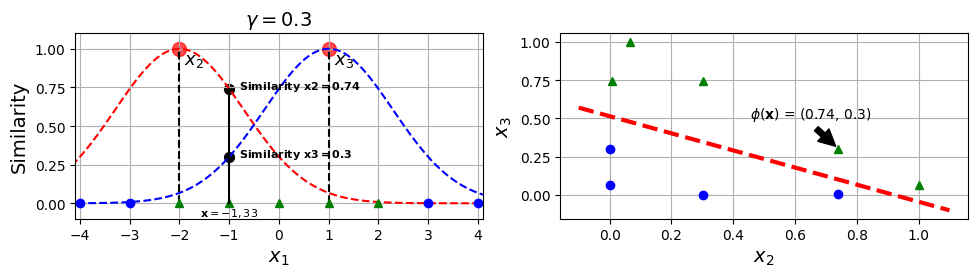

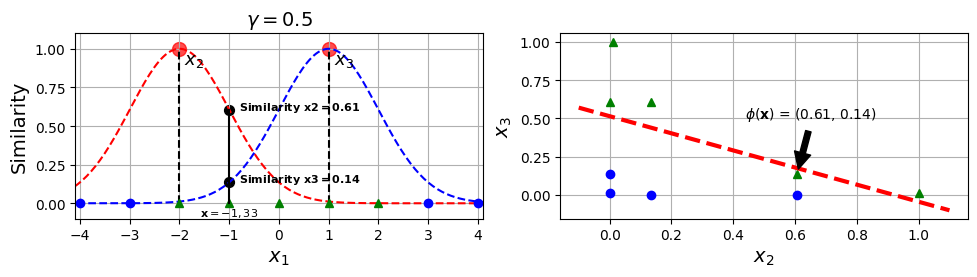

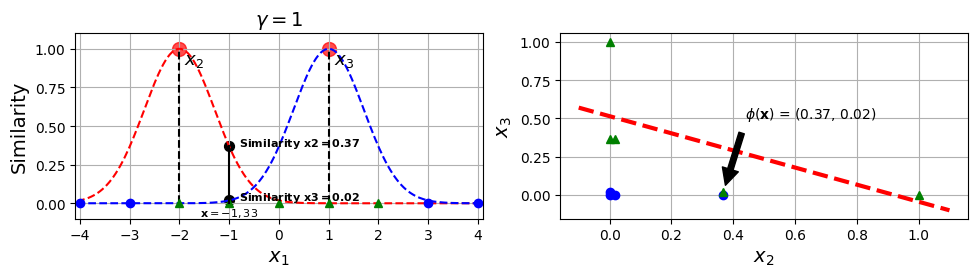

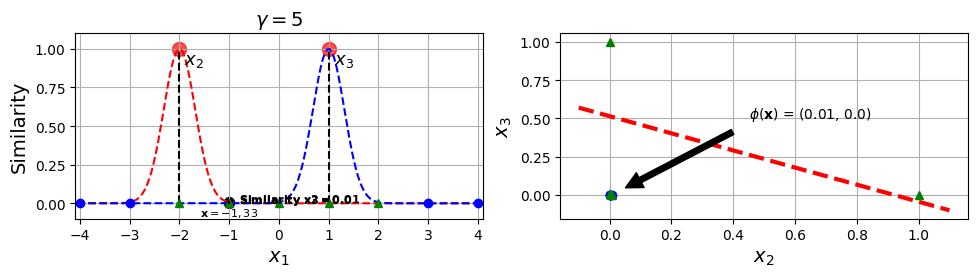

In [210]:
main(gamma=0.3)
main(gamma=.5)
main(gamma=1)
main(gamma=5)

### Trick Kernel RBF

In [251]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons


def kernel_rbf_clf(C, gamma):

    pipeline = make_pipeline(
        StandardScaler(),
        SVC(kernel='rbf', C=C, gamma=gamma)
    )

    return pipeline

def plot_feature( X,y):
    
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')

def plt_countour_map( pipeline, C, gamma):

    x0s = np.linspace(-1.5, 2.5, 200)
    x1s = np.linspace(-1, 1.5, 200)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]

    y_pred = pipeline.predict(X).reshape(x0.shape)
    y_decision= pipeline.decision_function(X).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.5)
    plt.contourf(x0, x1, y_decision.reshape(x0.shape), cmap=plt.cm.brg, alpha=0.2)
    plt.title(rf'C = {C}, $\gamma$ = {gamma}')

def main(hiperparametros):
    
    X, y = make_moons(n_samples=100, noise=.15, random_state=42)

    for params in hiperparametros:
        print(params)
        axes = params['axes']
        C = params['C']
        gamma = params['gamma']
        pipeline = kernel_rbf_clf(C,gamma).fit(X,y)
        plt.sca(axes)
        plot_feature(X,y)
        plt_countour_map(pipeline, C, gamma)
        plt.grid()

    plt.show()

{'axes': <Axes: >, 'C': 0.001, 'gamma': 0.1}
{'axes': <Axes: >, 'C': 1000, 'gamma': 0.1}
{'axes': <Axes: >, 'C': 0.001, 'gamma': 5}
{'axes': <Axes: >, 'C': 1000, 'gamma': 5}


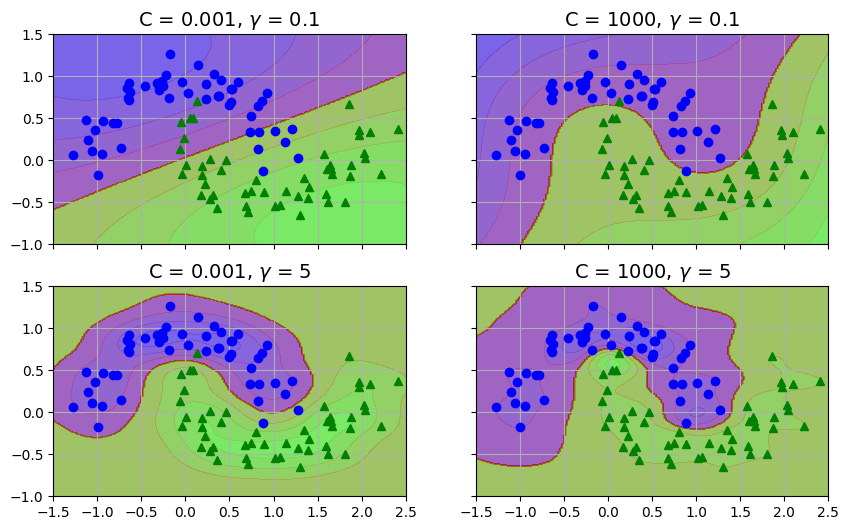

In [259]:
figure , axis= plt.subplots(ncols=2, nrows=2,  sharex=True, sharey=True, figsize = (10,6))

params = [
    {'axes':axis[0][0], 'C':.001, 'gamma': .1},
    {'axes':axis[0][1], 'C':1000, 'gamma': .1},
    {'axes':axis[1][0], 'C':.001, 'gamma': 5},
    {'axes':axis[1][1], 'C':1000, 'gamma': 5},
]

main(params)

Gamma: controla a influencia dos pontos no contorno, maior ou menor curvatura.

C: penaliza os erros, controla a margem de distancia.